# Time series forecasting fundamentals with TensorFlow - Milestone Project : BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

Got the data from: https://finance.yahoo.com/quote/BTC-USD/history/

⚠ **Note:** This is not financial advice.

##Importing times series with pandas

In [1]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC-USD (1).csv",
                 parse_dates = ["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datatime

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3460 entries, 2014-09-17 to 2024-03-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3460 non-null   float64
 1   High       3460 non-null   float64
 2   Low        3460 non-null   float64
 3   Close      3460 non-null   float64
 4   Adj Close  3460 non-null   float64
 5   Volume     3460 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 189.2 KB


In [3]:
# How many samples do we have?
len(df)

3460

In [4]:
10*365

3650

We've collected the historical price of Bitcoin for the past ~10 years but there's 3460 samples.

🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [5]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df.Close).rename(columns = {"Close": 'Price'})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


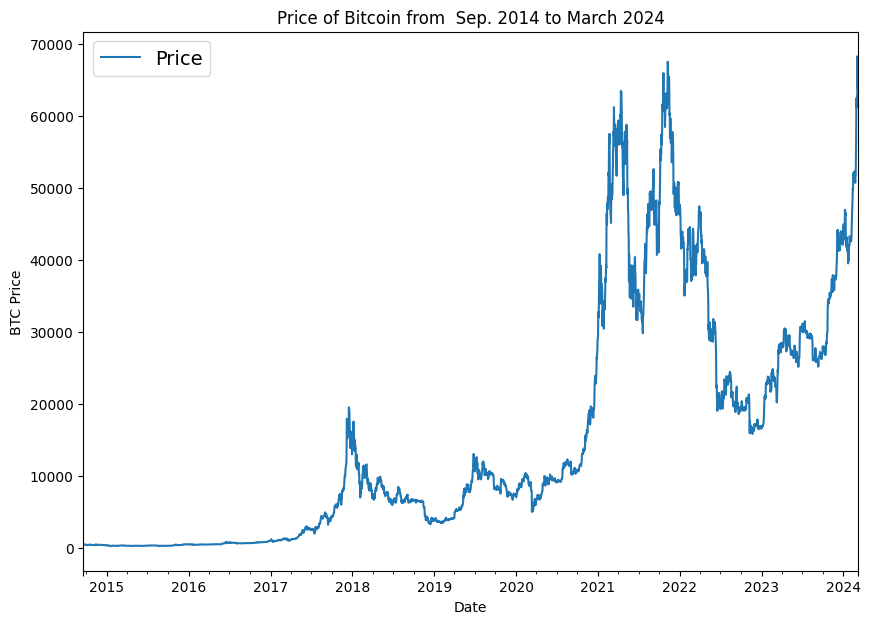

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from  Sep. 2014 to March 2024")
plt.legend(fontsize=14, loc= "upper left")

## Importing time series data with Python's CSV module



## Get data



In [7]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC-USD (1).csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)  # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))  # get the dates as dates (not strings)
    btc_price.append(float(line[4]))  # get the closing price as float
# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

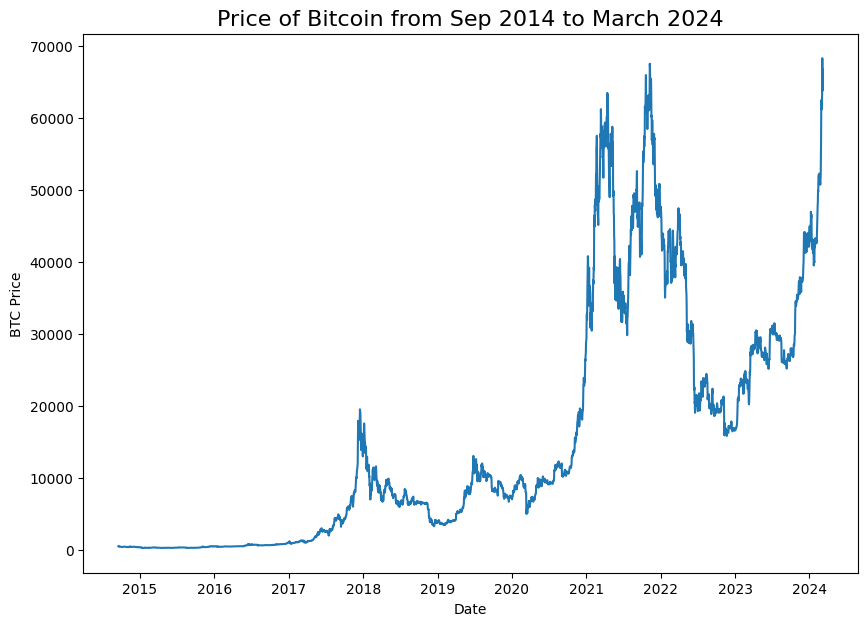

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Sep 2014 to March 2024", fontsize = 16)
plt.xlabel('Date');

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [9]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size = 0.2,
                                                    random_state =42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2768,), (692,), (2768,), (692,))

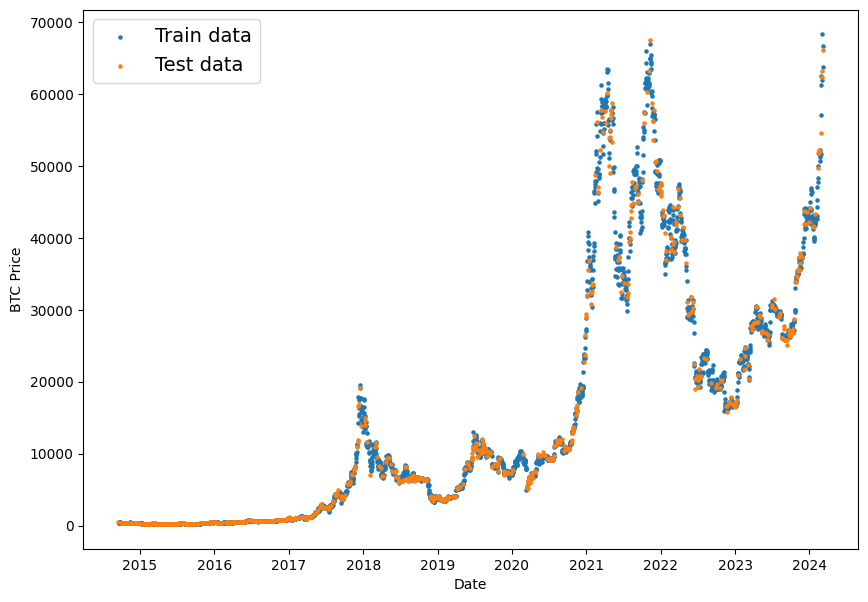

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s=5, label = "Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14, loc= "upper left")
plt.show();

### Create train & test sets for time series (the right way)

In [13]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these value as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2768, 692, 2768, 692)

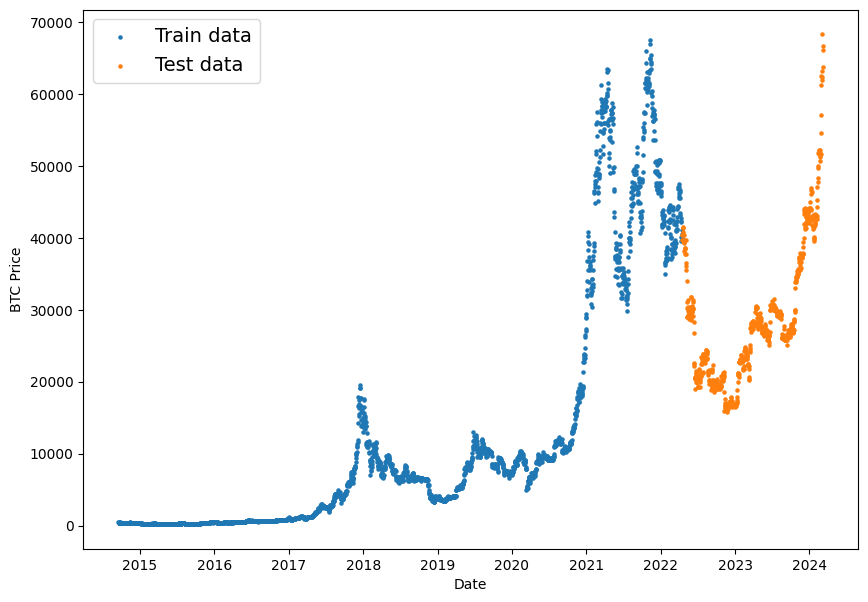

In [14]:
# Plot correctly made splits
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s=5, label = "Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14, loc= "upper left")
plt.show();

## Create a plotting function
Typing plotting code is tedious, let's functionize it.

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end= None, label= None):
  """
  Plots timesteps (a series of points in time) against  value ( a series of values across timesteps)

  Parameters
  ---------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (similar a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """

  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14, loc = "upper left") # make label bigger
  plt.grid(True)

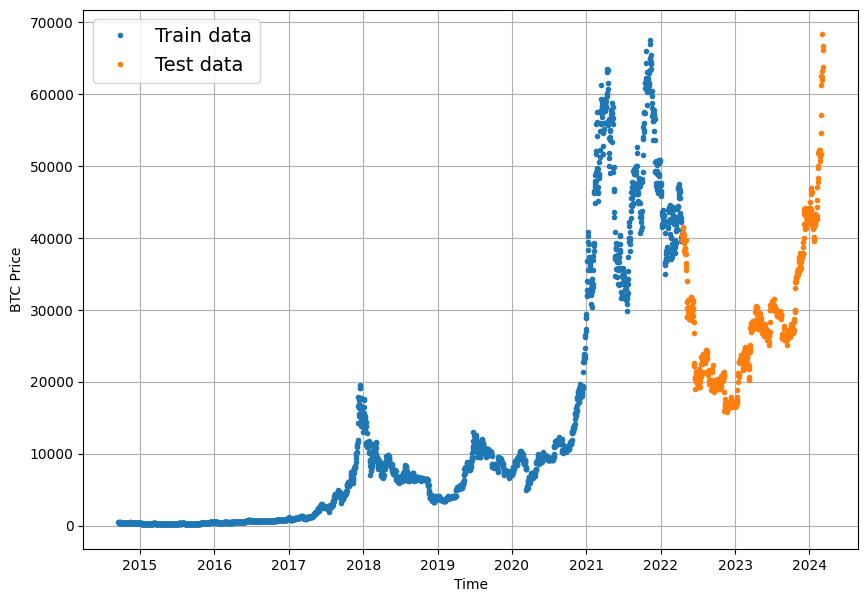

In [16]:
# Test out plotting function
plt.figure(figsize= (10, 7))
plot_time_series(timesteps =X_train, values =y_train, label ="Train data")
plot_time_series(timesteps =X_test, values =y_test, label = "Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:
* 0	Naïve model (baseline)	NA	NA	NA
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1, horizon = 1, window = 30
* 3	Same as 1, horizon = 7, window = 30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

in English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [17]:
y_test[:10]

array([40424.484375, 39716.953125, 40826.214844, 41502.75    ,
       41374.378906, 40527.363281, 39740.320313, 39486.730469,
       39469.292969, 40458.308594])

In [18]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([40424.484375, 39716.953125, 40826.214844, 41502.75    ,
        41374.378906, 40527.363281, 39740.320313, 39486.730469,
        39469.292969, 40458.308594]),
 array([54522.402344, 57085.371094, 62504.789063, 61198.382813,
        62440.632813, 62029.847656, 63167.371094, 68330.414063,
        63801.199219, 66106.804688]))

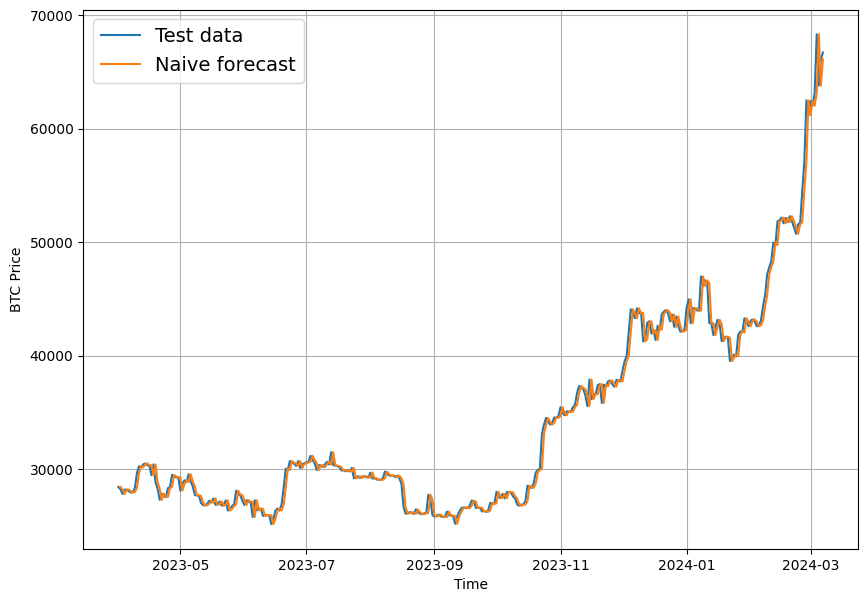

In [19]:
# Plot naive forecast
plt.figure(figsize =(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start = 350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll  need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE 0 that is better than an MAE of 100


The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

> **Resource:** For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8]("https://otexts.com/fpp3/accuracy.html")

In [20]:
import tensorflow as tf


In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [22]:
# Test MASE (it should close 1 or 1 with the naive forecast)
mean_absolute_scaled_error(y_true = y_test[1:], y_pred =naive_forecast).numpy()

1.000492012077504

## Make our evaluation function work for larger horizons

In [23]:
# Create a function to take in model predictions and truth values and return evaluation
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metrics calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metricss (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true = y_test[1:],
                              y_pred = naive_forecast)
naive_results

{'mae': 528.27594,
 'mse': 719679.4,
 'rmse': 848.3392,
 'mape': 1.8367157,
 'mase': 1.0004921}

In [25]:
# mae shows is 500 dollar off fron the prediction
naive_forecast[-10:]

array([54522.402344, 57085.371094, 62504.789063, 61198.382813,
       62440.632813, 62029.847656, 63167.371094, 68330.414063,
       63801.199219, 66106.804688])

In [26]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=28457.24392901445>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=15787.28418>,
 <tf.Tensor: shape=(), dtype=float64, numpy=68330.414063>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:

> * [Moving average]("https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/")
> * [ARIMA (Autoregression Integrated Moving Average)]("https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/")
> * [sktime (Scikit-Learn for time series)]("https://github.com/alan-turing-institute/sktime")
> * [TensorFlow Decision Forests (random forest, gradient boosting trees)]("https://www.tensorflow.org/decision_forests")
> * [Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)]("https://github.com/facebookresearch/Kats")
> * [LinkedIn Greykite (flexible, intuitive and fast forecasts)]("https://github.com/linkedin/greykite")

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
len(y_train)

2768

In [29]:
# What we want to do with our Bitcoin data

print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [30]:
# Let's setup global variable for window and window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [31]:
# Create function to label windowed data
def get_labelled_windows(x, horizon = HORIZON):
  """
  Create labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [32]:

# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

we need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

> 📖**Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [33]:
import numpy as np
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis =0).T # create 2D array of windows size
  # print(f"window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [34]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3453, 3453)

In [35]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [36]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [57085.371094 62504.789063 61198.382813 62440.632813 62029.847656
 63167.371094 68330.414063] -> Label: [63801.199219]
Window: [62504.789063 61198.382813 62440.632813 62029.847656 63167.371094
 68330.414063 63801.199219] -> Label: [66106.804688]
Window: [61198.382813 62440.632813 62029.847656 63167.371094 68330.414063
 63801.199219 66106.804688] -> Label: [66723.046875]


> 🔑**Note:** There's a function which does similar to the above function in tf.keras.preprocessing: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [37]:
# Make the train/test split
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20%
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [38]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2762, 691, 2762, 691)

In [39]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [40]:
test_windows[:5], test_labels[:5]

(array([[42207.671875, 39521.902344, 40127.183594, 41166.730469,
         39935.515625, 40553.464844, 40424.484375],
        [39521.902344, 40127.183594, 41166.730469, 39935.515625,
         40553.464844, 40424.484375, 39716.953125],
        [40127.183594, 41166.730469, 39935.515625, 40553.464844,
         40424.484375, 39716.953125, 40826.214844],
        [41166.730469, 39935.515625, 40553.464844, 40424.484375,
         39716.953125, 40826.214844, 41502.75    ],
        [39935.515625, 40553.464844, 40424.484375, 39716.953125,
         40826.214844, 41502.75    , 41374.378906]]),
 array([[39716.953125],
        [40826.214844],
        [41502.75    ],
        [41374.378906],
        [40527.363281]]))

In [41]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performance against the other model's best performances.

For example if our model performd the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [42]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor= "val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)


## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why this values?
I picked them out of experimentation.

* **Hyperparameters** = values you can adjust themselves
* Parameters = values a model learns on its own


In [43]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation= "linear")
], name= "model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
22/22 [==============================] - 4s 67ms/step - loss: 2428.0020 - mae: 2428.0020 - mse: 30168624.0000 - val_loss: 914.7267 - val_mae: 914.7267 - val_mse: 2016600.5000
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 686.9667 - mae: 686.9667 - mse: 2104655.0000 - val_loss: 1057.1193 - val_mae: 1057.1193 - val_mse: 2404462.0000
Epoch 3/100
22/22 [==============================] - 1s 33ms/step - loss: 587.1875 - mae: 587.1875 - mse: 1598582.2500 - val_loss: 829.9252 - val_mae: 829.9252 - val_mse: 1676868.5000
Epoch 4/100
22/22 [==============================] - 0s 23ms/step - loss: 530.6561 - mae: 530.6561 - mse: 1321884.8750 - val_loss: 816.5782 - val_mae: 816.5782 - val_mse: 1654021.8750
Epoch 5/100
22/22 [==============================] - 0s 23ms/step - loss: 520.5078 - mae: 520.5078 - mse: 1257749.0000 - val_loss: 802.3855 - val_mae: 802.3855 - val_mse: 1488335.8750
Epoch 6/100
22/22 [==============================] - 0s 21ms/step - loss: 51

In [44]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 545.2589 - mae: 545.2589 - mse: 726320.5625


[545.2589111328125, 545.2589111328125, 726320.5625]

In [45]:
# load in saved best performing model_1 and evaluate it on test data
model_1= tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 530.9428 - mae: 530.9428 - mse: 723365.4375


[530.9428100585938, 530.9428100585938, 723365.4375]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts because actual forecasts are int the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [46]:
def make_preds(model, input_data):
  """
  Uses model make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [47]:
# Make predictions using model_1 on the test datasetand view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

22/22 [==============================] - 0s 2ms/step


(691,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([40474.113, 39772.312, 40688.996, 41417.418, 41395.777, 40734.066,
        39867.293, 39477.586, 39397.832, 40266.277], dtype=float32)>)

In [48]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([691]), TensorShape([691]))

In [49]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

In [50]:
naive_results

{'mae': 528.27594,
 'mse': 719679.4,
 'rmse': 848.3392,
 'mape': 1.8367157,
 'mase': 1.0004921}

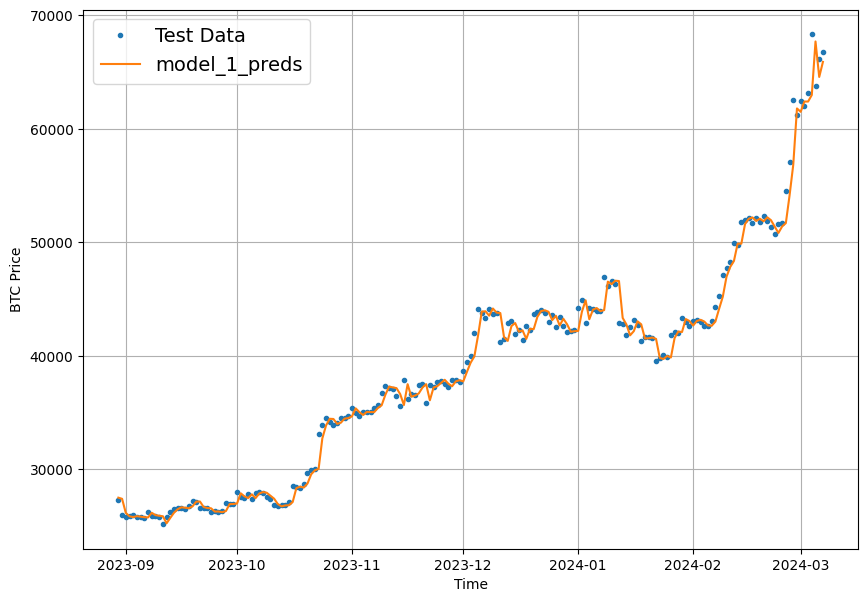

In [51]:
# Let's plot our model 1 predictions
offset= 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values= model_1_preds,
                 start= offset,
                 format="-",
                 label= "model_1_preds")

## Model 2: Dense(windows=30, horizon =1)

In [52]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [53]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon= HORIZON)
len(full_windows), len(full_labels)

(3430, 3430)

In [54]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2744, 686, 2744, 686)

In [55]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation ="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [56]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 737.1223


737.1222534179688

In [57]:
# load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 577.5474


577.5474243164062

In [58]:
# Get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

22/22 [==============================] - 0s 1ms/step


In [59]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([686]), TensorShape([686]))

In [60]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 577.5475,
 'mse': 801578.25,
 'rmse': 895.309,
 'mape': 2.032178,
 'mase': 1.0965596}

In [61]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

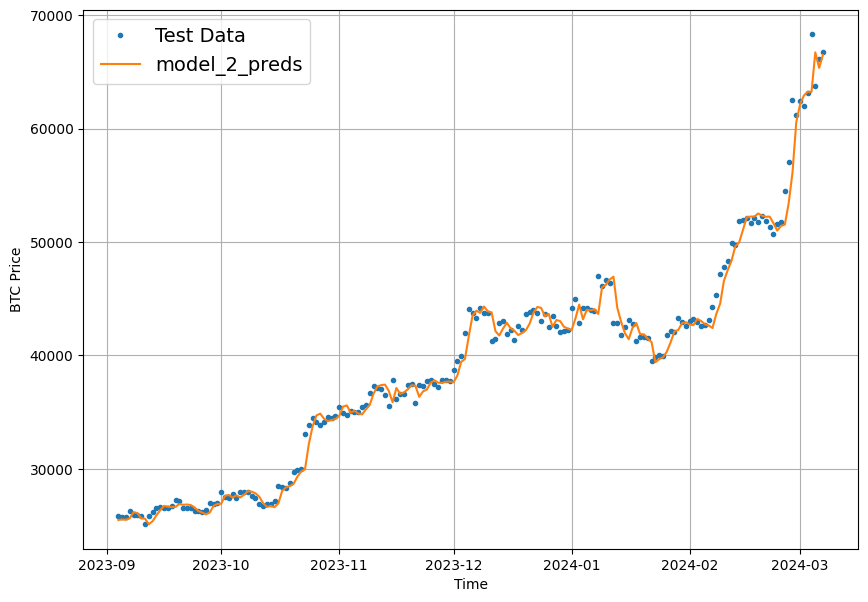

In [62]:
offset=500
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds")

## Model 3: Dense(window=30, horizon=7)


In [63]:
prices[:10]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985, 423.204987, 411.574005, 404.424988])

In [64]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(3424, 3424)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows= full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2739, 685, 2739, 685)

In [66]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss = "MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [67]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1273.9586


1273.9586181640625

In [68]:
# Load best version of model_3 and evaluate
model_3= tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1135.4244


1135.4244384765625

In [69]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[40499.984, 40509.664, 40448.824, 39593.414, 40155.574, 40779.176,
        40732.48 ],
       [39731.1  , 39810.047, 40262.254, 39666.273, 39971.66 , 40189.863,
        40931.293],
       [40177.215, 40937.305, 40673.492, 40317.164, 41169.75 , 40514.656,
        41071.918],
       [40313.703, 41608.36 , 41352.637, 40621.25 , 40589.61 , 41508.76 ,
        40985.95 ],
       [41110.54 , 42026.992, 41915.438, 41320.07 , 40998.367, 42352.637,
        41569.496]], dtype=float32)>

In [70]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([40996.5  , 40433.133, 39434.242, 39285.266, 39584.16 ],
      dtype=float32)>

In [71]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([685, 7]), TensorShape([686]))

In [72]:
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1135.4244


1135.4244384765625

In [73]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1135.4244,
 'mse': 3322221.8,
 'rmse': 1306.4746,
 'mape': 4.007507,
 'mase': 2.1886775}

In [74]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[40499.984, 40509.664, 40448.824, 39593.414, 40155.574, 40779.176,
        40732.48 ],
       [39731.1  , 39810.047, 40262.254, 39666.273, 39971.66 , 40189.863,
        40931.293],
       [40177.215, 40937.305, 40673.492, 40317.164, 41169.75 , 40514.656,
        41071.918],
       [40313.703, 41608.36 , 41352.637, 40621.25 , 40589.61 , 41508.76 ,
        40985.95 ],
       [41110.54 , 42026.992, 41915.438, 41320.07 , 40998.367, 42352.637,
        41569.496]], dtype=float32)>

In [75]:
test_labels[:, 0]

array([39716.953125, 40826.214844, 41502.75    , 41374.378906,
       40527.363281, 39740.320313, 39486.730469, 39469.292969,
       40458.308594, 38117.460938, 39241.121094, 39773.828125,
       38609.824219, 37714.875   , 38469.09375 , 38529.328125,
       37750.453125, 39698.371094, 36575.140625, 36040.921875,
       35501.953125, 34059.265625, 30296.953125, 31022.90625 ,
       28936.355469, 29047.751953, 29283.103516, 30101.265625,
       31305.113281, 29862.917969, 30425.857422, 28720.271484,
       30314.333984, 29200.740234, 29432.226563, 30323.722656,
       29098.910156, 29655.585938, 29562.361328, 29267.224609,
       28627.574219, 28814.900391, 29445.957031, 31726.390625,
       31792.310547, 29799.080078, 30467.488281, 29704.390625,
       29832.914063, 29906.662109, 31370.671875, 31155.478516,
       30214.355469, 30111.998047, 29083.804688, 28360.810547,
       26762.648438, 22487.388672, 22206.792969, 22572.839844,
       20381.650391, 20471.482422, 19017.642578, 20553.

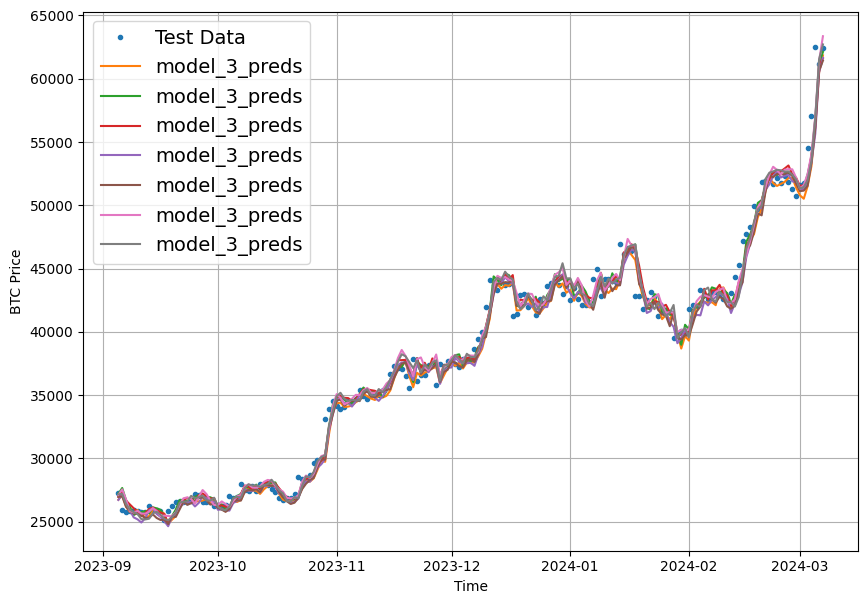

In [76]:
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 format="-",
                 label="model_3_preds")

In [77]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([40499.984, 40509.664, 40448.824, 39593.414, 40155.574, 40779.176,
       40732.48 ], dtype=float32)>

In [78]:
tf.reduce_mean(model_3_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=28067.152>

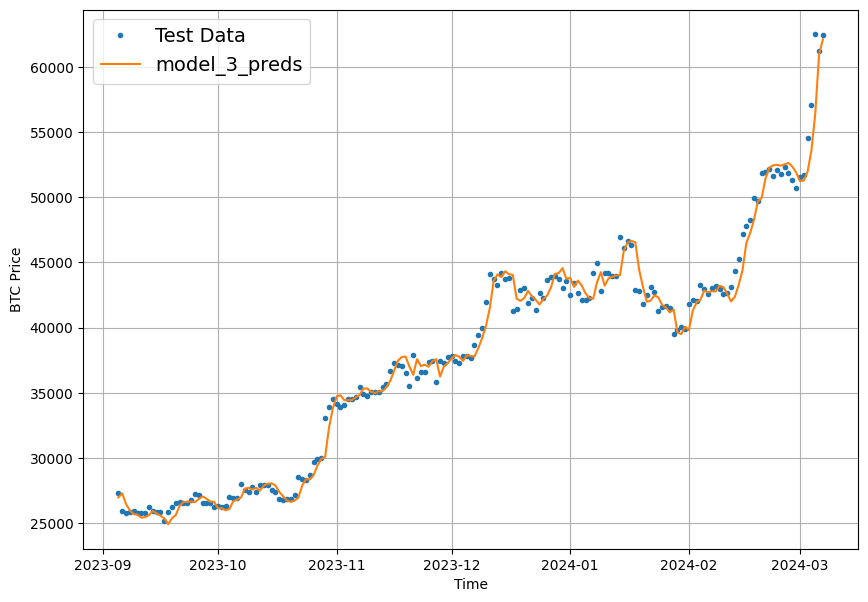

In [79]:
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

## Which of our model is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

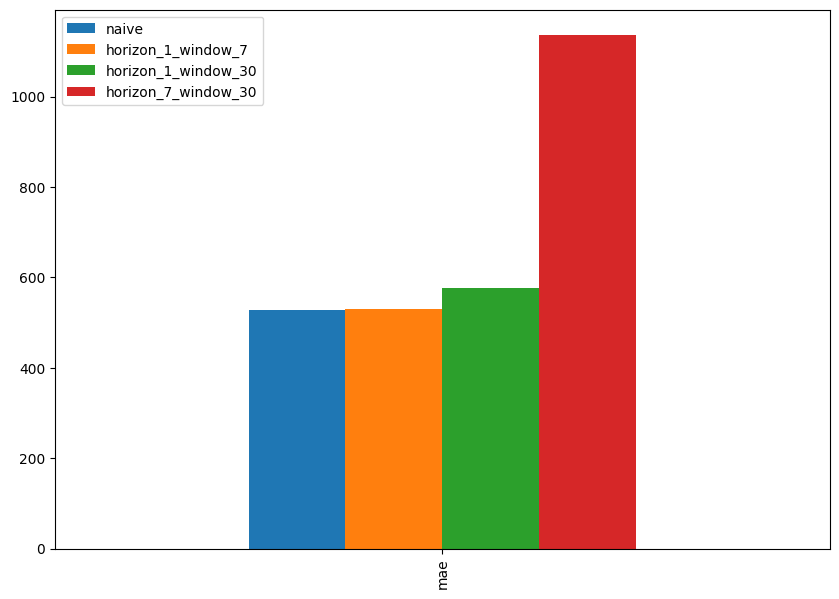

In [80]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7" : model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind = "bar");

## Model 4: Conv1D

In [81]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # ude previous week worth data


In [82]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3453, 3453)

In [83]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2762, 2762, 691, 691)

To use the Con1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)...`

However our data isn't in that shape yet...

In [84]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [85]:
# Before we pass our data to the Conv1D layer, we have to reshape it in orde to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [86]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis =1)) # add an extra dimension for `input_dim`

In [87]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [88]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters= 128, kernel_size=5, strides=1, padding="causal", activation= "relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# compile model
model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [89]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# Evaluate model_4
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 561.1446


561.1445922851562

In [91]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 530.1380


530.1380004882812

In [92]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([40480.906, 39906.96 , 40581.37 , 41430.81 , 41481.445, 40730.83 ,
       39927.316, 39502.086, 39419.594, 40241.418], dtype=float32)>

In [93]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 530.1379,
 'mse': 714204.75,
 'rmse': 845.1063,
 'mape': 1.8579383,
 'mase': 1.0040184}

In [94]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [95]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences= True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs= inputs, outputs=output, name= "model_5_LSTM")

# compile
model_5.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
22/22 [==============================] - 3s 79ms/step - loss: 8698.2422 - val_loss: 12851.2002
Epoch 2/100
22/22 [==============================] - 2s 107ms/step - loss: 2665.8420 - val_loss: 1792.5671
Epoch 3/100
22/22 [==============================] - 1s 71ms/step - loss: 782.7718 - val_loss: 1315.1174
Epoch 4/100
22/22 [==============================] - 1s 68ms/step - loss: 649.4222 - val_loss: 987.4955
Epoch 5/100
22/22 [==============================] - 2s 98ms/step - loss: 633.6616 - val_loss: 964.1811
Epoch 6/100
22/22 [==============================] - 2s 94ms/step - loss: 619.5605 - val_loss: 959.2386
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 614.7200 - val_loss: 960.6149
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 612.2692 - val_loss: 979.3817
Epoch 9/100
22/22 [==============================] - 0s 6ms/step - loss: 607.8795 - val_loss: 965.6963
Epoch 10/100
22/22 [==============================] - 1s 68m

In [96]:
# Load in the best version of model 5 and evalute
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 563.1302


563.1302490234375

In [97]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([40381.29 , 39971.59 , 40546.426, 41120.027, 41421.51 ],
      dtype=float32)>

In [98]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred= model_5_preds)
model_5_results

{'mae': 563.13025,
 'mse': 790719.8,
 'rmse': 889.22424,
 'mape': 1.98359,
 'mase': 1.066502}

In [99]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

🔑**Note:** Because neural network are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performance or usable results.

## Make a Multivariate time series dataset

Before we add a feature to our time serie, what is a feature we can use?

One feature we could add is whether or not Stanley tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [100]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [101]:
# Let's add the bitcoin halving to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data; it starts from 01 november 2014)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020
block_reward_5 = 3.125 # 19th April 2024 (currently in feburary)

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64("2020-05-18")
block_reward_5_datetime = np.datetime64("2024-04-18")

In [102]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [103]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [104]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


In [105]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2024-03-03,63167.371094,6.25
2024-03-04,68330.414063,6.25
2024-03-05,63801.199219,6.25
2024-03-06,66106.804688,6.25
2024-03-07,66723.046875,6.25


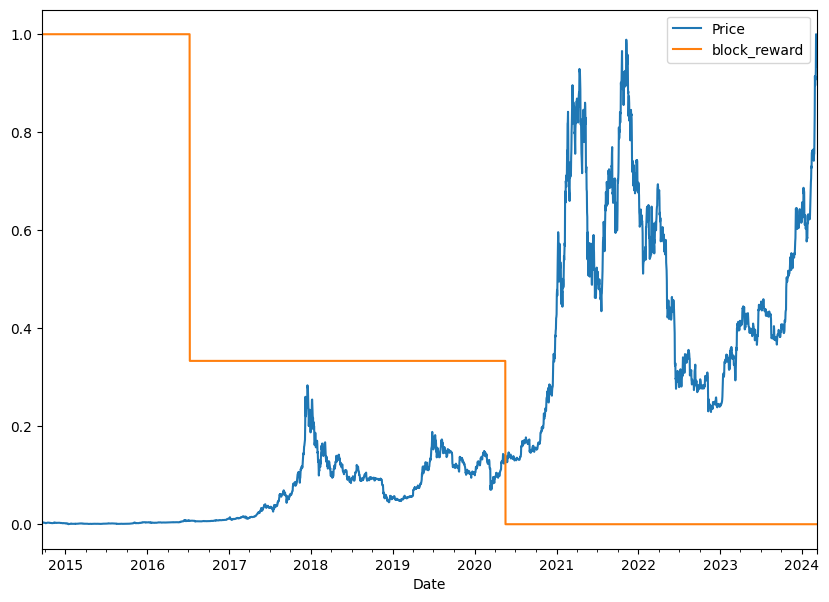

In [106]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns= bitcoin_prices_block.columns,
                                                                       index= bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worrry, we can use the `pandas.DataFrame.shift()` method to window our multivariate data.

In [107]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7


In [108]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [109]:
# Create X (windows) and y features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [110]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [111]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2762, 2762, 691, 691)

## Model 6: Dense (multivariate time series)

In [112]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6= tf.keras.Sequential([
    layers.Dense(128, activation= "relu"),
    # layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs = 100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
22/22 [==============================] - 2s 52ms/step - loss: 6657.3359 - val_loss: 5614.2891
Epoch 2/100
22/22 [==============================] - 1s 50ms/step - loss: 1174.8934 - val_loss: 1421.8751
Epoch 3/100
22/22 [==============================] - 1s 28ms/step - loss: 715.1696 - val_loss: 1100.8529
Epoch 4/100
22/22 [==============================] - 1s 24ms/step - loss: 684.7532 - val_loss: 1094.7013
Epoch 5/100
22/22 [==============================] - 1s 32ms/step - loss: 663.6467 - val_loss: 1025.4071
Epoch 6/100
22/22 [==============================] - 1s 25ms/step - loss: 673.0480 - val_loss: 1000.9360
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 663.1155 - val_loss: 1056.6682
Epoch 8/100
22/22 [==============================] - 1s 37ms/step - loss: 618.4028 - val_loss: 944.2607
Epoch 9/100
22/22 [==============================] - 1s 26ms/step - loss: 596.9263 - val_loss: 913.9148
Epoch 10/100
22/22 [==============================] - 0s

In [113]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 4ms/step - loss: 560.2830


560.2830200195312

In [114]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 4ms/step - loss: 529.3597


529.3597412109375

In [115]:
# Make predictions with multivariate
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

22/22 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([40318.81 , 39792.363, 40738.117, 41367.305, 41462.96 , 40691.812,
       39767.41 , 39519.254, 39448.22 , 40279.2  ], dtype=float32)>

In [116]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 529.35974,
 'mse': 717413.8,
 'rmse': 847.00287,
 'mape': 1.8536445,
 'mase': 1.0025446}

In [117]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

Note: we can improve the multivariate model by using hybrid model

## Model 7: N-BEATS algorithm

Let's now try build the biggest time series forecasting model we've built so far.

More specificically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/abs/1905.10437

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

## Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing
Page 3 slide

In [118]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):     # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of n fully connected layers, each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)

        # output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

Let's test NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [119]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons= 128,
                                       n_layers=4)

In [120]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis= 0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [121]:
# Pass dummy inputs to dummy NBestsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-1.0614797   0.38436154 -0.20723581  0.26467258 -0.04335821 -0.2003158
  0.17286241]
Forecast: 0.5043685436248779


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performance data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance


In [122]:
# Create N-Beats data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [123]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Prices+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [124]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2762, 2762, 691, 691)

In [125]:
# Time to make our dataset performance usinh tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameterd for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [126]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = WINDOW_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see this: https://en.wikipedia.org/wiki/Residual_neural_network

And this: https://arxiv.org/abs/1512.03385

In [127]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Substract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Inputs tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Substracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Inputs tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Substracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [128]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBEATSBLOCK` (this'll be the intial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the keras Functional API)
3. Make the intial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBEATSBLOCK` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of the N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [129]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [130]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
    )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[EarlyStopping(monitor="val_loss",
                                     patience= 200,
                                     restore_best_weights=True),
                       ReduceLROnPlateau(monitor="val_loss",
                                         patience=100,
                                         verbose=1)])


Epoch 716: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1203: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1303: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 6min 42s, sys: 9.85 s, total: 6min 52s
Wall time: 9min 17s


In [131]:
# Evaluation N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 527.5826


527.5825805664062

In [132]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([40327.78 , 39785.293, 40666.24 , 41391.086, 41434.863, 40583.66 ,
       39735.78 , 39479.047, 39462.297, 40301.543], dtype=float32)>

In [133]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 527.5826,
 'mse': 713934.8,
 'rmse': 844.9466,
 'mape': 1.843984,
 'mase': 0.99917895}

In [134]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

In [135]:
naive_results

{'mae': 528.27594,
 'mse': 719679.4,
 'rmse': 848.3392,
 'mape': 1.8367157,
 'mase': 1.0004921}

### Plotting the N-BEATS architecture we've created

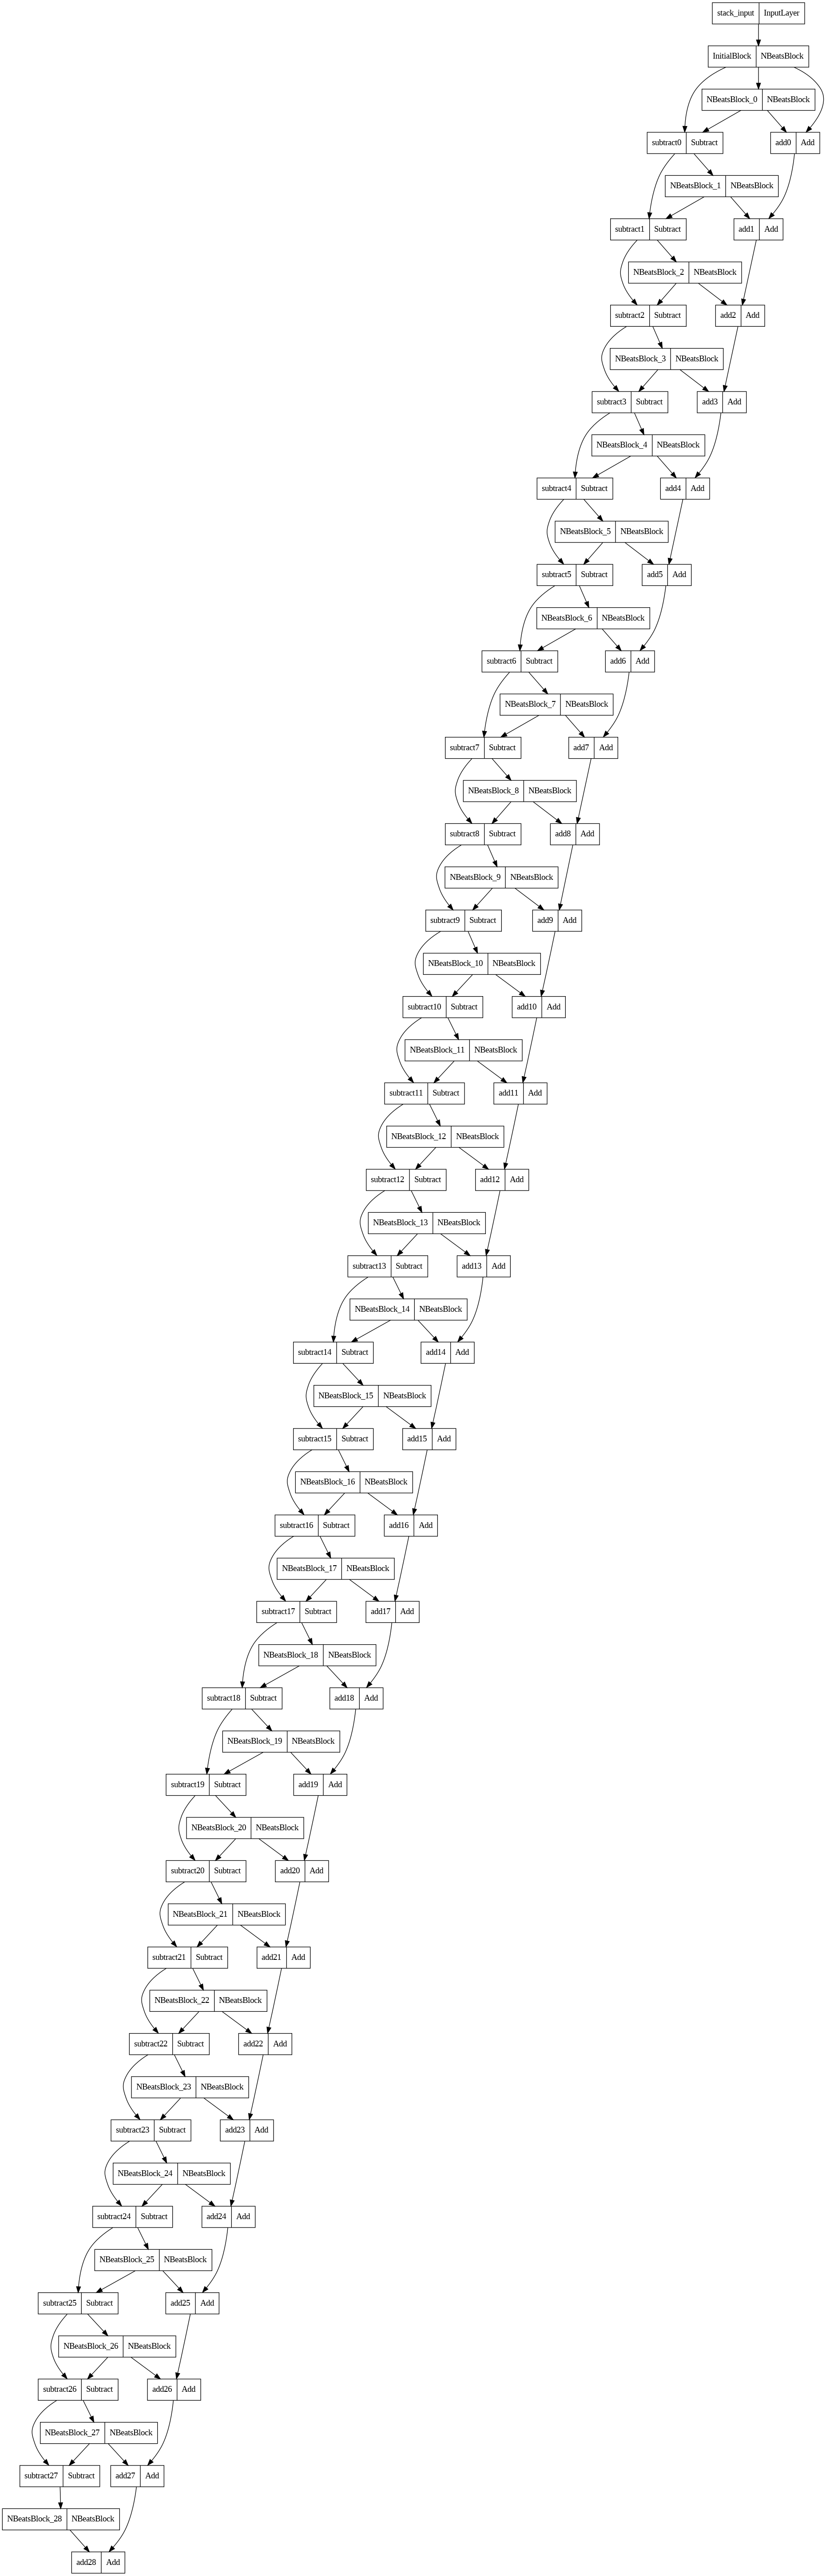

In [136]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverage the wisdom of the crowd effect.

It combines many _different_ models to predict a common goal.

In [137]:
HORIZON, WINDOW_SIZE

(1, 7)

In [138]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=["mae", 'mse', 'mape']):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.
  For example, if num_iter=10, a lidt of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """

  # Make empty list for trained ensemble models
  ensemble_models= []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different losss function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals
          layers.Dense(128, kernel_initializer= "he_normal", activation= "relu"),
          layers.Dense(128, kernel_initializer= "he_normal", activation= "relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model current loss functiion
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data= test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
    # Append fitted model to list of ensemble models
    ensemble_models.append(model)

  return ensemble_models

In [139]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 769: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 876: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 976: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 972: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 184: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 545: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 651: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 751: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 934: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing 

In [140]:
!nvidia-smi

Mon Mar 11 12:28:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              32W /  70W |   1157MiB / 15360MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [141]:
len(ensemble_models)

5

In [142]:
ensemble_models

In [143]:
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Make predictions with our ensemble model


In [144]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [145]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step
CPU times: user 254 ms, sys: 8.98 ms, total: 263 ms
Wall time: 289 ms


<tf.Tensor: shape=(5, 691), dtype=float32, numpy=
array([[40247.242, 39717.41 , 40910.035, ..., 68849.2  , 63837.875,
        65566.84 ],
       [40425.004, 39734.723, 40785.56 , ..., 68780.42 , 63820.41 ,
        65831.64 ],
       [40066.906, 39663.75 , 40847.652, ..., 68681.07 , 63341.812,
        66595.805],
       [40246.184, 39597.875, 40890.824, ..., 68059.4  , 63648.38 ,
        66307.93 ],
       [40545.152, 39691.273, 40686.64 , ..., 67797.85 , 64731.098,
        65744.73 ]], dtype=float32)>

In [146]:
ensemble_preds

<tf.Tensor: shape=(5, 691), dtype=float32, numpy=
array([[40247.242, 39717.41 , 40910.035, ..., 68849.2  , 63837.875,
        65566.84 ],
       [40425.004, 39734.723, 40785.56 , ..., 68780.42 , 63820.41 ,
        65831.64 ],
       [40066.906, 39663.75 , 40847.652, ..., 68681.07 , 63341.812,
        66595.805],
       [40246.184, 39597.875, 40890.824, ..., 68059.4  , 63648.38 ,
        66307.93 ],
       [40545.152, 39691.273, 40686.64 , ..., 67797.85 , 64731.098,
        65744.73 ]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into **point prediction** we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [147]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([40306.1  , 39681.008, 40824.145, 41406.184, 41403.375, 40616.684,
       39696.727, 39476.906, 39484.83 , 40381.047], dtype=float32)>

In [148]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([40247.242, 39691.273, 40847.652, 41379.69 , 41432.727, 40616.906,
       39630.875, 39471.258, 39475.793, 40366.906], dtype=float32)

In [149]:
# Evaluate enemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)

ensemble_results

{'mae': 528.3237,
 'mse': 720658.25,
 'rmse': 848.91595,
 'mape': 1.8459377,
 'mase': 1.0005826}

In [150]:
# Evaluate enemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)

ensemble_results

{'mae': 527.4466,
 'mse': 721655.1,
 'rmse': 849.50287,
 'mape': 1.8412762,
 'mase': 0.9989214}

In [151]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will $67,0000USD
Wouldn't it be helpful if we knew a range of where that predictions came from?
Instead of 67,000USD on the dot, how about 65,000 to 69,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming distribution is Guassian/Normal, 95% of observation fall within 1.96 standard deviation of the mean)
4. To the get the prediction interval upper and lower bounds, add and substract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/97.5th_percentile_point
* https://www.uber.com/en-NG/blog/neural-networks-uncertainty-estimation/

In [152]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(691,), dtype=float32, numpy=
array([164.65237  ,  48.009777 ,  80.95949  ,  90.05455  ,  54.75709  ,
        37.82941  , 122.54084  ,  56.08088  ,  38.967125 ,  67.32587  ,
        57.534454 ,  55.54618  ,  49.777508 ,  66.42961  ,  49.543312 ,
       110.12283  ,  61.02874  ,  20.379387 ,  82.0494   , 154.95317  ,
        85.25986  , 143.8351   , 194.49232  , 231.03273  , 283.95016  ,
       176.16928  , 327.12097  , 109.89737  , 129.58646  , 108.45929  ,
       143.19875  , 108.64916  , 146.07535  ,  98.72864  , 113.09483  ,
        80.946625 ,  62.35857  , 134.6426   ,  99.73527  ,  81.290924 ,
        32.490948 ,  49.618664 ,  51.07745  ,  44.236122 ,  68.47364  ,
       105.344604 ,  52.600864 ,  92.307045 , 129.51396  , 118.626686 ,
       104.98228  ,  46.3587   ,  88.3601   ,  50.81102  ,  49.628857 ,
        92.61046  ,  88.681694 ,  72.79055  , 283.3831   , 164.00354  ,
       168.83148  , 507.1045   , 535.5746   ,  80.601295 ,  89.19668  ,
       139.48805

In [153]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intinalized
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [154]:
# Get the upper and lower bounds of the 95% percnet prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

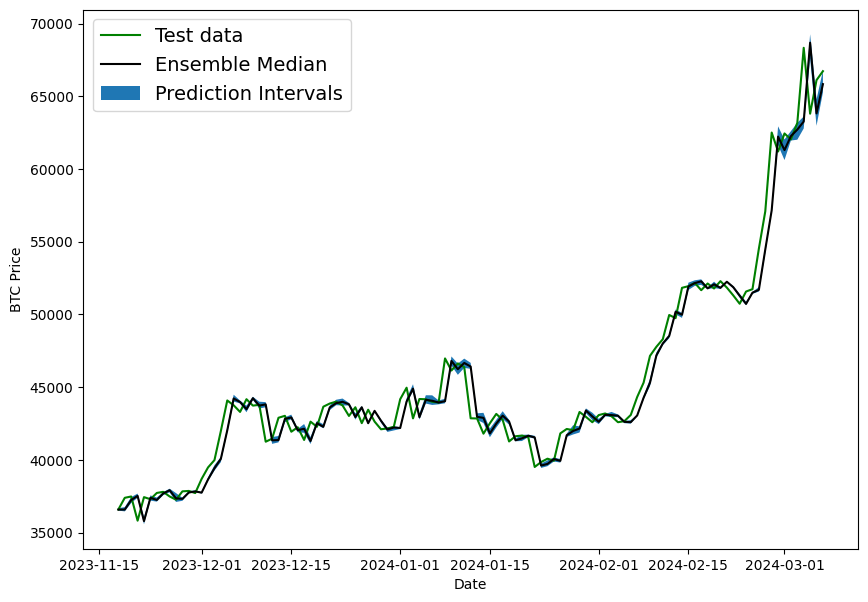

In [155]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the )
offset=580
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label= "Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label= "Ensemble Median")
plt.xlabel('Date')
plt.ylabel("BTC Price")

# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], alpha=1, label="Prediction Intervals")
plt.legend(loc= "upper left", fontsize=14);

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑**Note:** These predictions intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

### Aside: Two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively answer the questions:

1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning:
> * **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
> * **Epsitemic uncertainty** - this type of uncertainty can be reducedm it also referred to as "model" or "coconut" uncertainty.

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudo future.
Let's now build a model which is capable of predicting into the future!

In [156]:
HORIZON = 1
WINDOW_SIZE = 7

In [157]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [158]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-03-03,63167.371094,6.25,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281
2024-03-04,68330.414063,6.25,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344
2024-03-05,63801.199219,6.25,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094
2024-03-06,66106.804688,6.25,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063
2024-03-07,66723.046875,6.25,66106.804688,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813


In [159]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

(3453, 3453)

In [160]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [161]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [162]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name= "model_9_all")

# Compile
model_9.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs = 100,
            verbose=0)

## Make predictions into future

In [163]:
# How many timesteps to predict into the future?
INTO_FUTURE= 14

To make predictions into the future we want  a function which:

1. Takes as input:
> * a list of values (Bitcoin historical data)
> * a trained model (such as `model_9`)
> * a window into the future to predict (0ur `INTO_FUTURE` variable)
> * the window size a model was trained on (`WINDOW_SIZW`) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this wil be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values

3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [164]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """

  # 2. Createe an empty list for future Forecast/prepaaaare data to forecaast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting of:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [165]:
# Make forecast into future
future_forecast = make_future_forecasts(values = y_all,
                                        model = model_9,
                                        into_future= INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 49ms/step
Predicting of:
 [62440.632813 62029.847656 63167.371094 68330.414063 63801.199219
 66106.804688 66723.046875] -> Prediction: 62579.33984375

1/1 [==============================] - 0s 17ms/step
Predicting of:
 [62029.847656   63167.371094   68330.414063   63801.199219
 66106.804688   66723.046875   62579.33984375] -> Prediction: 64888.96875

1/1 [==============================] - 0s 17ms/step
Predicting of:
 [63167.371094   68330.414063   63801.199219   66106.804688
 66723.046875   62579.33984375 64888.96875   ] -> Prediction: 64978.4453125

1/1 [==============================] - 0s 17ms/step
Predicting of:
 [68330.414063   63801.199219   66106.804688   66723.046875
 62579.33984375 64888.96875    64978.4453125 ] -> Prediction: 67296.4609375

1/1 [==============================] - 0s 18ms/step
Predicting of:
 [63801.199219   66106.804688   66723.046875   62579.33984375
 64888.96875    64978.4453125  67296.4609375 ] -> Prediction: 65416.

In [166]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-03-03,63167.371094,6.25,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281
2024-03-04,68330.414063,6.25,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344
2024-03-05,63801.199219,6.25,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094
2024-03-06,66106.804688,6.25,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063
2024-03-07,66723.046875,6.25,66106.804688,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813


### Plot future forecasts

In [167]:
future_forecast

[62579.34,
 64888.97,
 64978.445,
 67296.46,
 65416.555,
 66207.92,
 65800.37,
 64148.05,
 66242.06,
 65972.19,
 67100.05,
 66230.66,
 66156.27,
 65949.08]

In [168]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" dtands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [169]:
# Last timestep of timesteps (currently np.datetiime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2024-03-07 00:00:00')

In [170]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future = INTO_FUTURE)
next_time_steps

array(['2024-03-08', '2024-03-09', '2024-03-10', '2024-03-11',
       '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15',
       '2024-03-16', '2024-03-17', '2024-03-18', '2024-03-19',
       '2024-03-20', '2024-03-21'], dtype='datetime64[D]')

In [171]:
bitcoin_prices.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01',
               '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05',
               '2024-03-06', '2024-03-07'],
              dtype='datetime64[ns]', name='Date', length=3460, freq=None)

In [172]:
# Insert last timestep/final price into next time steps and future forecasts so th plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0,last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10',
        '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14',
        '2024-03-15', '2024-03-16', '2024-03-17', '2024-03-18',
        '2024-03-19', '2024-03-20', '2024-03-21'], dtype='datetime64[D]'),
 array([66723.05 , 62579.34 , 64888.97 , 64978.445, 67296.46 , 65416.555,
        66207.92 , 65800.37 , 64148.05 , 66242.06 , 65972.19 , 67100.05 ,
        66230.66 , 66156.27 , 65949.08 ], dtype=float32))

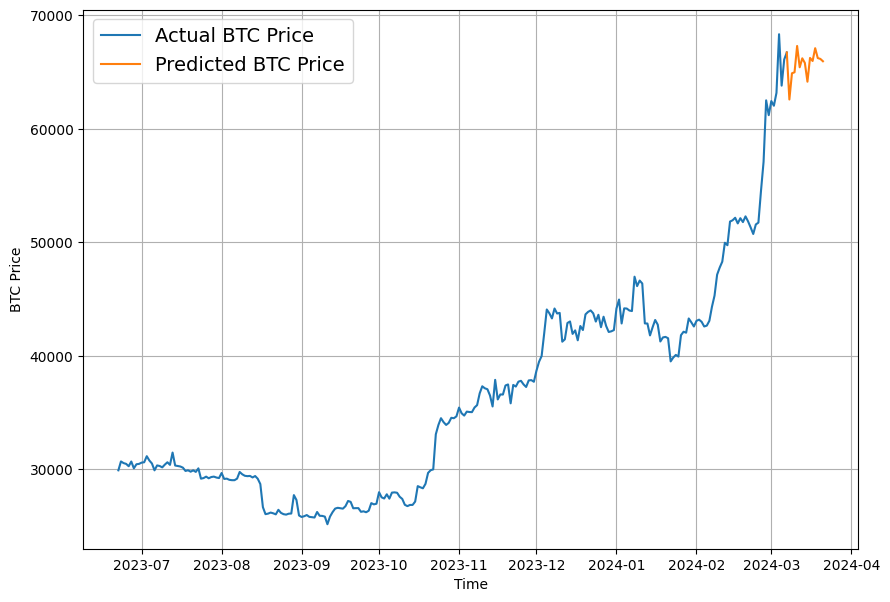

In [194]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize = (10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=3200, format= "-", label= "Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format= "-", label = "Predicted BTC Price")

## Model 10: Why forecasting is BS

In [174]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100. in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100


In [175]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[57085.371094,
 62504.789063,
 61198.382813,
 62440.632813,
 62029.847656,
 63167.371094,
 68330.414063,
 63801.199219,
 66106.804688,
 667.23046875]

In [176]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2024-02-27T00:00:00.000000000', '2024-02-28T00:00:00.000000000',
       '2024-02-29T00:00:00.000000000', '2024-03-01T00:00:00.000000000',
       '2024-03-02T00:00:00.000000000', '2024-03-03T00:00:00.000000000',
       '2024-03-04T00:00:00.000000000', '2024-03-05T00:00:00.000000000',
       '2024-03-06T00:00:00.000000000', '2024-03-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

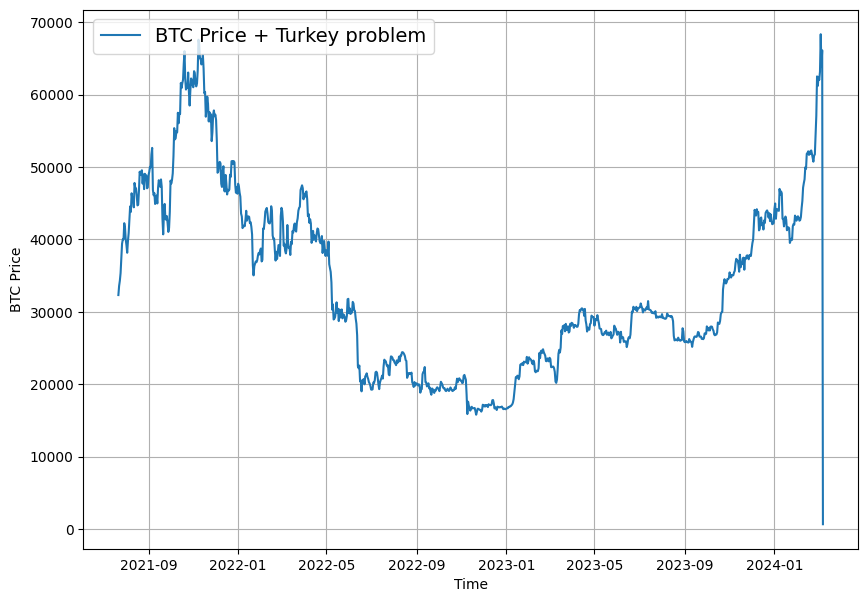

In [177]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label= "BTC Price + Turkey problem",
                 start=2500)

In [178]:
# Create train and test sets for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon = HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2762, 691, 2762, 691)

In [179]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [182]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer= tf.keras.optimizers.Adam())

#fit
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [183]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 645.3973


645.3972778320312

In [184]:
# Load best performing turkey mdoel and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 621.8613


621.8612670898438

In [185]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([40327.945, 39885.363, 40615.707, 41407.62 , 41518.984, 40659.965,
       39779.04 , 39485.816, 39437.38 , 40263.594], dtype=float32)>

In [186]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 10000.191,
 'mse': 174788050.0,
 'rmse': 12506.019,
 'mape': 42.413067,
 'mase': 16.078436}

In [187]:
model_1_results

{'mae': 530.9428,
 'mse': 723365.4,
 'rmse': 850.50885,
 'mape': 1.859354,
 'mase': 1.0055429}

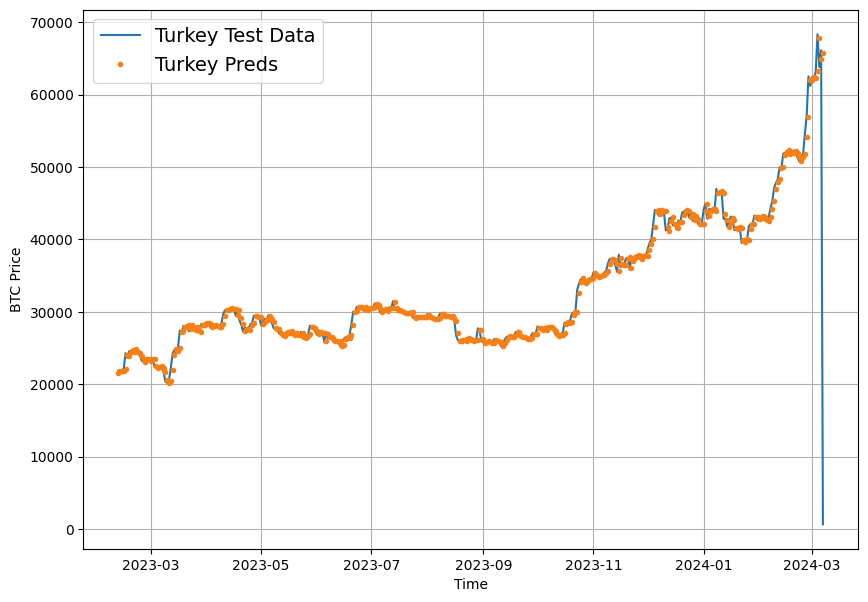

In [188]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values= btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label = "Turkey Preds",
                 start= offset);

### Compare models

In [189]:
# Compare different model results (W = window, h= horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey":turkey_results}).T

model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,528.275940,7.196794e+05,848.339172,1.836716,1.000492
model_1_dense_w7_h1,530.942810,7.233654e+05,850.508850,1.859354,1.005543
model_2_dense_w30_h1,577.547485,8.015782e+05,895.309021,2.032178,1.096560
model_3_dense_w30_h7,1135.424438,3.322222e+06,1306.474609,4.007507,2.188678
model_4_CONV1D,530.137878,7.142048e+05,845.106323,1.857938,1.004018
model_5_LSTM,563.130249,7.907198e+05,889.224243,1.983590,1.066502
model_6_multivariate,529.359741,7.174138e+05,847.002869,1.853644,1.002545
model_7_NBEATS,527.582581,7.139348e+05,844.946594,1.843984,0.999179
model_8_ensemble,527.446594,7.216551e+05,849.502869,1.841276,0.998921
model_10_turkey,10000.191406,1.747880e+08,12506.018555,42.413067,16.078436


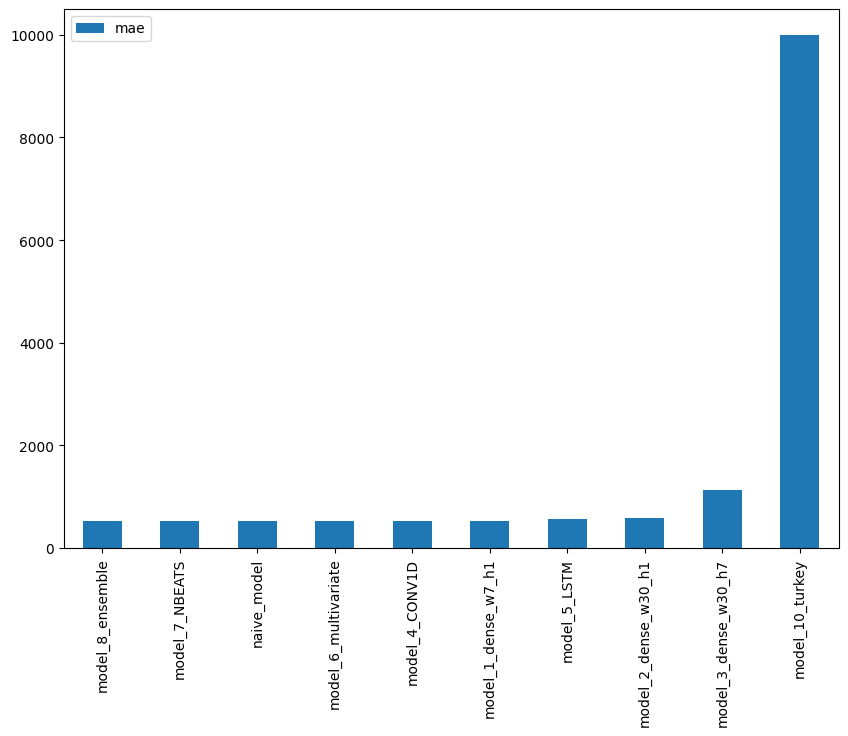

In [190]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar");

Open system data is difficult to forecast or to be precise it cannot be predicted with open system historical data,
 the models must have been overfitting or the data is "Aleatoric uncertainty" which i will say is the later for BITCOIN case or any similar case like stock market open system data or oil market price etc.
 > **Note** there can be possibility of certainity if we can have access to the close system data for bitcoin or stock market price there is a likeliness we will predict with certainity.

 [what can be forecast]("https://otexts.com/fpp3/what-can-be-forecast.html")